In [3]:

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


csv_file = 'cveDetailsFull.csv'
df = pd.read_csv(csv_file)


In [4]:
from sklearn.model_selection import train_test_split

#drop some useless predictors that do not affect the outcome
df = df.drop('CVE ID', axis=1)
df = df.drop('Link to CVE', axis=1)
df = df.drop('Year', axis=1)

# Declare feature vector and target variable
X = df.drop(['CVSS Score Category'], axis=1)
y = df['CVSS Score Category']

#split to test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# print(X_train.shape)
# print( X_test.shape)
# X_train.dtypes

# display categorical variables. 
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']



In [5]:
#check if there is any null
X_train[categorical].isnull().mean()

# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()


Confidentiality Impact    0
Integrity Impact          0
Availability Impact       0
Access Complexity         0
Authentication            0
Gained Access             0
Vulnerability Type(s)     0
dtype: int64

In [6]:

import category_encoders as ce

#change formatting to  0 or 1 for each of the possible value
#eg: integrity impact partial none full to integerity impact 1 (0,1), impact 2..
encoder = ce.OneHotEncoder(cols=['Confidentiality Impact',
 'Integrity Impact',
 'Availability Impact',
 'Access Complexity',
 'Authentication',
 "Gained Access",
 'Vulnerability Type(s)'
])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/opt/homebrew/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is

In [49]:
# declaring the columns format to follow the encond
cols = X_train.columns


MultiIndex([(              'CVSS_Score',),
            ('Confidentiality Impact_1',),
            ('Confidentiality Impact_2',),
            ('Confidentiality Impact_3',),
            (      'Integrity Impact_1',),
            (      'Integrity Impact_2',),
            (      'Integrity Impact_3',),
            (   'Availability Impact_1',),
            (   'Availability Impact_2',),
            (   'Availability Impact_3',),
            (     'Access Complexity_1',),
            (     'Access Complexity_2',),
            (     'Access Complexity_3',),
            (        'Authentication_1',),
            (        'Authentication_2',),
            (         'Gained Access_1',),
            ( 'Vulnerability Type(s)_1',),
            ( 'Vulnerability Type(s)_2',),
            ( 'Vulnerability Type(s)_3',),
            ( 'Vulnerability Type(s)_4',),
            ( 'Vulnerability Type(s)_5',),
            ( 'Vulnerability Type(s)_6',),
            ( 'Vulnerability Type(s)_7',),
           

In [9]:
# 11. "Feature Scaling" 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# X_train.head()


In [11]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model + variance smoothing to slightly improve the model 
#variance smoothing is the only hyper tuning parameter available. (TBC)
gnb = GaussianNB(var_smoothing=0.1)

# fit the model
gnb.fit(X_train, y_train)

#predict the result
y_pred = gnb.predict(X_test)


In [12]:
#Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9054


In [13]:
# Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)
y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9045


In [14]:
# Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9045
Test set score: 0.9054


In [15]:
# check class distribution in test set

y_test.value_counts()

Medium      12317
High         4953
Critical     3469
Name: CVSS Score Category, dtype: int64

In [16]:
# check null accuracy score

null_accuracy = (12317/(12317+4953+3469))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

# We can see that our model accuracy score(test-set) is 0.9054 but null accuracy score is 0.5939. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Null accuracy score: 0.5939


In [86]:
#  3 by 3 Confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels =  ["Medium", "High", "Critical"] ) 

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[12057    93   167]
 [  208  3288  1457]
 [    0    37  3432]]


<AxesSubplot: >

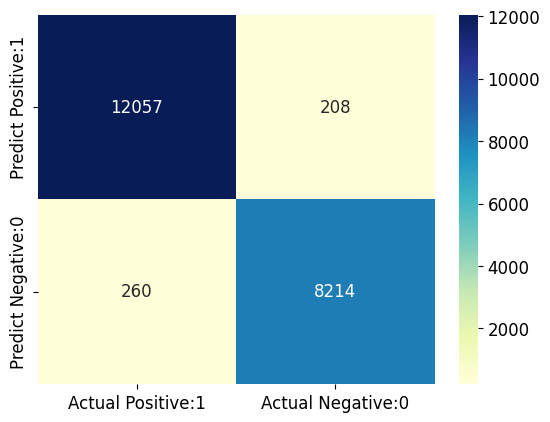

In [89]:
# visualize confusion matrix for Medium with seaborn heatmap
import seaborn as sns

#CM for Medium
cmMedium = [ 
    #True positive [1]
    [cm[0,0], 
    #False positive [4,7] 
    (cm[1,0] + cm[2,0]) 
    ],
    [
    #false negative [2,3]
        cm[0,1] + cm[0,2],
    #True Negative [5,6,8,9]
        cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2] 
    ] ]

cm_matrix = pd.DataFrame(data=cmMedium, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [90]:
#for medium class
TP = cmMedium[0][0]
TN = cmMedium[1][1]
FP = cmMedium[0][1]
FN = cmMedium[1][0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

              precision    recall  f1-score   support

    Critical       0.68      0.99      0.81      3469
        High       0.96      0.66      0.79      4953
      Medium       0.98      0.98      0.98     12317

    accuracy                           0.91     20739
   macro avg       0.87      0.88      0.86     20739
weighted avg       0.93      0.91      0.90     20739



<AxesSubplot: >

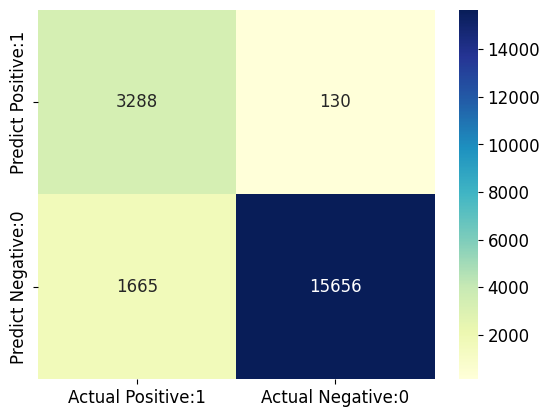

In [121]:
#class 2 High
# visualize confusion matrix for High with seaborn heatmap

#CM for High
cmHigh = [ 
    #True positive [5]
    [cm[1,1], 
    #False positive [2,8] 
    (cm[0,1] + cm[2,1]) 
    ],
    [
    #false negative [4,6]
        cm[1,0] + cm[1,2],
    #True Negative [1,3,7,9]
        cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2] 
    ] ]

cm_matrix = pd.DataFrame(data=cmHigh, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [122]:
#for class 2
TP = cmHigh[0][0]
TN = cmHigh[1][1]
FP = cmHigh[0][1]
FN = cmHigh[1][0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9134
Classification error : 0.0866
Precision : 0.9620
Recall or Sensitivity : 0.6638
True Positive Rate : 0.6638
False Positive Rate : 0.0082
Specificity : 0.9918


In [ ]:
#class 3 Critical
# visualize confusion matrix for Critical with seaborn heatmap

#CM for Critical
cmCritical = [ 
    #True positive [9]
    [cm[2,2], 
    #False positive [3,6] 
    (cm[0,2] + cm[1,2]) 
    ],
    [
    #false negative [7,8]
        cm[2,0] + cm[2,1],
    #True Negative [1,2,4,5]
        cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1] 
    ] ]

cm_matrix = pd.DataFrame(data=cmCritical, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#for class 3
TP = cmCritical[0][0]
TN = cmCritical[1][1]
FP = cmCritical[0][1]
FN = cmCritical[1][0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

In [123]:
#classification report for Medium, High, Critical
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Critical       0.68      0.99      0.81      3469
        High       0.96      0.66      0.79      4953
      Medium       0.98      0.98      0.98     12317

    accuracy                           0.91     20739
   macro avg       0.87      0.88      0.86     20739
weighted avg       0.93      0.91      0.90     20739



In [124]:
# print the first 10 predicted probabilities of 

y_pred_prob = gnb.predict_proba(X_test)[0:10]

array([[1.51397960e-26, 9.99923275e-01, 7.67246856e-05],
       [8.70344381e-35, 1.18342930e-11, 1.00000000e+00],
       [1.00000000e+00, 2.57704375e-10, 7.74299264e-16],
       [1.45861701e-35, 4.46729363e-12, 1.00000000e+00],
       [9.99999978e-01, 2.16570686e-08, 3.61492857e-17],
       [1.45861701e-35, 4.46729363e-12, 1.00000000e+00],
       [2.12692199e-38, 7.22272104e-18, 1.00000000e+00],
       [1.48679910e-24, 8.74958670e-04, 9.99125041e-01],
       [1.74702474e-33, 4.20865507e-11, 1.00000000e+00],
       [2.12692199e-38, 7.22272104e-18, 1.00000000e+00]])

In [125]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Medium', 'High', "Critical"])

y_pred_prob_df

,Medium,High,Critical
0,1.513980e-26,9.999233e-01,7.672469e-05
1,8.703444e-35,1.183429e-11,1.000000e+00
2,1.000000e+00,2.577044e-10,7.742993e-16
3,1.458617e-35,4.467294e-12,1.000000e+00
4,1.000000e+00,2.165707e-08,3.614929e-17
5,1.458617e-35,4.467294e-12,1.000000e+00
6,2.126922e-38,7.222721e-18,1.000000e+00
7,1.486799e-24,8.749587e-04,9.991250e-01
8,1.747025e-33,4.208655e-11,1.000000e+00
9,2.126922e-38,7.222721e-18,1.000000e+00


In [126]:
# print the first 10 predicted probabilility
gnb.predict_proba(X_test)[0:10, 0]

array([9.99923275e-01, 1.18342930e-11, 2.57704375e-10, 4.46729363e-12,
       2.16570686e-08, 4.46729363e-12, 7.22272104e-18, 8.74958670e-04,
       4.20865507e-11, 7.22272104e-18])

In [127]:
# store the predicted probabilities for class. 
y_pred1C = gnb.predict_proba(X_test)[:, 0] #critical is good
y_pred1H = gnb.predict_proba(X_test)[:, 1] #high
y_pred1M = gnb.predict_proba(X_test)[:, 2] #medium



Text(0, 0.5, 'Frequency')

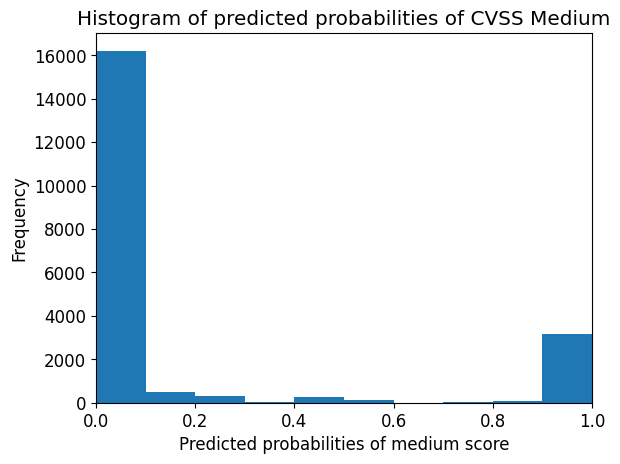

In [162]:
# # plot histogram of predicted probabilities


# # adjust the font size 
# plt.rcParams['font.size'] = 12

# # plot histogram with 10 bins
# plt.hist(y_pred1M, bins = 10)

# # set the title of predicted probabilities
# plt.title('Histogram of predicted probabilities of CVSS category')

# # set the x-axis limit
# plt.xlim(0,1)

# # set the title
# plt.xlabel('Predicted probabilities ')
# plt.ylabel('Frequency')

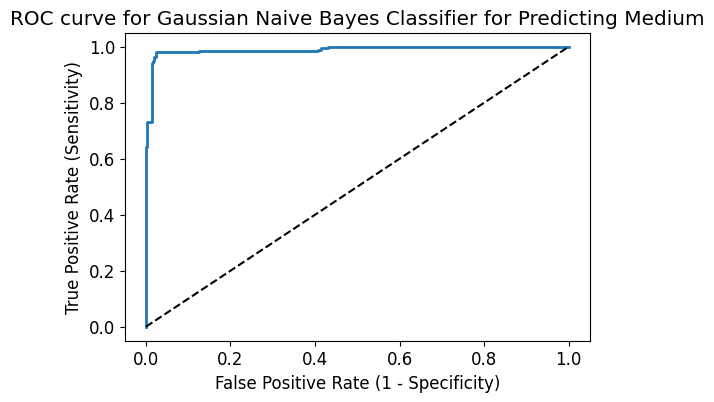

In [163]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1M, pos_label = 'Medium')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Medium')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)


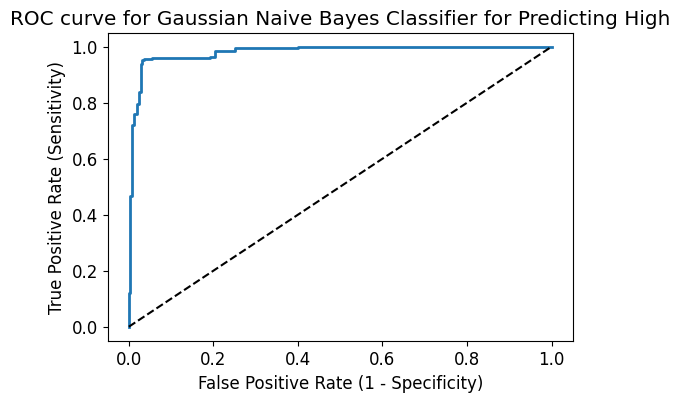

0.981266346326187


In [172]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1H, pos_label = 'High')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting High')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)


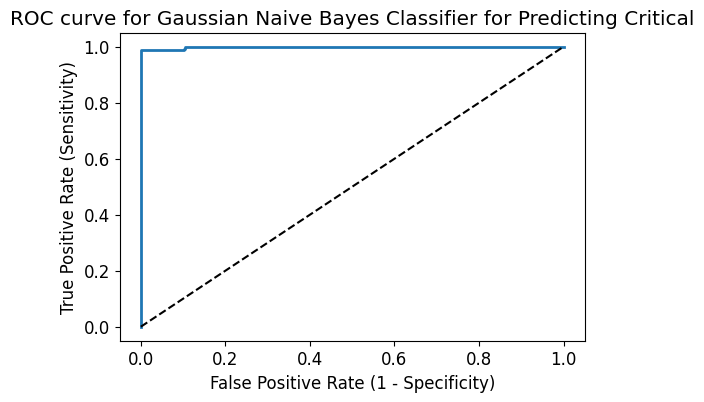

In [173]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1C, pos_label = 'Critical')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Critical')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)


In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

#ref: https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a


labels = ["Medium","High","Critical"]
ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_pred, classes=labels)

#using OVR cause we comparing that class against other classes
# roc_auc_score(ytest, ypreds,multi_class='ovo')
roc_auc_score(ytest, ypreds,multi_class='ovr') 

0.9175161492722014

In [177]:
#cross validation
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
clf = SVC()  

#what they used to score it #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

scores = cross_validate(gnb, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)






dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])

[0.99979335 0.99989667 0.99979335 1.         1.        ]

<class 'dict'>
{'fit_time': array([0.70618296, 0.64666772, 1.00386405, 0.8773241 , 0.82229519]), 'score_time': array([0.31598425, 0.32036495, 0.38710093, 0.33151102, 0.45200896]), 'test_acc': array([0.99979335, 0.99989667, 0.99979335, 1.        , 1.        ]), 'train_acc': array([0.99994833, 0.99997417, 0.99994833, 1.        , 0.99997417]), 'test_prec_macro': array([0.99970989, 0.99985482, 0.99970977, 1.        , 1.        ]), 'train_prec_macro': array([0.99992741, 0.9999637 , 0.99992742, 1.        , 0.9999637 ]), 'test_rec_micro': array([0.99957859, 0.99994253, 0.99973196, 1.        , 1.        ]), 'train_rec_micro': array([0.99997126, 0.99998563, 0.99993296, 1.        , 0.99998563])}


In [ ]:
print("test accuracy")
print(scores["test_acc"])
print(scores["test_acc"].mean())
print(scores["test_acc"].std())
print( '%.08f' % scores["test_acc"].std())


print()
print("train accuracy")
print(scores["train_acc"])
print(scores["train_acc"].mean())
print(scores["train_acc"].std())
print( '%.08f' % scores["train_acc"].std())


print()
print("test precision macro")
print(scores["test_precision_macro"])
print(scores["test_precision_macro"].mean())
print(scores["test_precision_macro"].std())
print( '%.08f' % scores["test_precision_macro"].std())


print()
print("train precision macro")
print(scores["train_precision_macro"])
print(scores["train_precision_macro"].mean())
print(scores["train_precision_macro"].std())
print( '%.08f' % scores["train_precision_macro"].std())



print()
print("test recall macro")
print(scores["test_recall_macro"])
print(scores["test_recall_macro"].mean())
print(scores["test_recall_macro"].std())
print( '%.08f' % scores["test_recall_macro"].std())


print(scores["train_recall_macro"])
print(scores["train_recall_macro"].mean())
print(scores["train_recall_macro"].std())
print( '%.08f' % scores["train_recall_macro"].std())


In [178]:
# Applying 10-Fold Cross Validation.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))



Cross-validation scores:[0.90452573 0.91630502 0.90142591 0.90307915 0.89956603 0.91341186
 0.90473238 0.90721223 0.9109136  0.90471269]
